# **Функция plt.scatter(). Диаграмма рассеяния**

За построение точечных диаграмм в библиотеке **matplotlib** отвечает функция `plt.scatter()`. Чтобы построить график, данной функции следует передать значения для осей абсцисс и ординат.

**Дополнительные аргументы:**
* `edgecolor`: позволяет менять цвет границ точек.
* `linewidth`: позволяет менять ширину границ точек.
* `alpha`: позволяет менять прозрачность точек. Имеет практическую пользу - позволяет обратить внимание, в каких местах плотность точек выше.

Функция `plt.scatter()` предоставляет возможность раскрасить точки графика, исходя из определённого условия. Это возможно реализовать, используя параметры `c` и `cmap`. Параметр `c` принимает на вход список или массив чисел и далее, в зависимости от выбранной цветовой карты `cmap`, из этой цветовой карты выбирается тот цвет, который соответствует числу параметра `c`.

Функция `plt.colorbar()` выводит шкалу цвета на экран. Имя задаётся при помощи функции `set_label()` (пример).

**Примечание:** полный список значений (цветовых карт) для `cmap` можно посмотреть следующим образом:

`from matplotlib import colormaps`

`list(colormaps)`

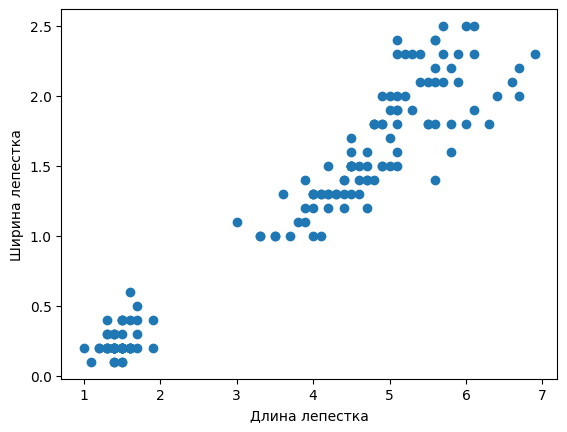

In [32]:
# пример построения диаграммы рассеяния
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

df['target'] = iris_dataset['target']
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

x = df['petal length (cm)']
y = df['petal width (cm)']

plt.scatter(x, y)
# есть и такой синтаксис 
# plt.scatter(x='petal length (cm)', y='petal width (cm)', data=df)

plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

plt.show()

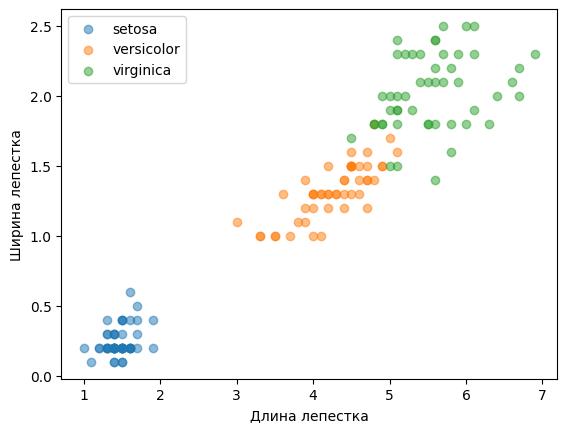

In [33]:
# пример построения диаграммы рассеяния с отнесением каждой точки к своему классу через groupby и цикл
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

df['target'] = iris_dataset['target']
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

x = 'petal length (cm)'
y = 'petal width (cm)'

groups = df.groupby('target')

for name, group in groups:
    plt.scatter(group[x], group[y], label=name, alpha=0.5)

plt.legend()
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

plt.show()

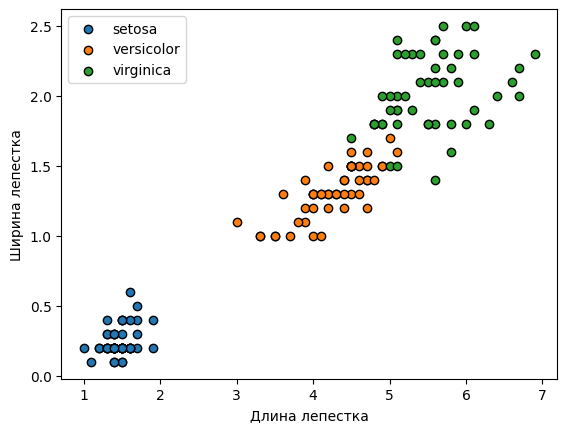

In [34]:
# пример построения диаграммы рассеяния с отнесением каждой точки к своему классу без groupby и цикла
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

df['target'] = iris_dataset['target']
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

x1 = df[df['target'] == 'setosa']['petal length (cm)']
y1 = df[df['target'] == 'setosa']['petal width (cm)']

x2 = df[df['target'] == 'versicolor']['petal length (cm)']
y2 = df[df['target'] == 'versicolor']['petal width (cm)']

x3 = df[df['target'] == 'virginica']['petal length (cm)']
y3 = df[df['target'] == 'virginica']['petal width (cm)']

fig, ax = plt.subplots()

ax.scatter(x1, y1, label='setosa', edgecolor='black')
ax.scatter(x2, y2, label='versicolor', edgecolor='black')
ax.scatter(x3, y3, label='virginica', edgecolor='black')

plt.legend()
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

plt.show()

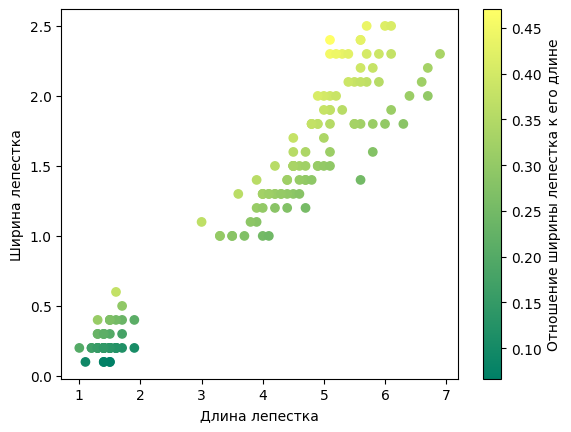

In [35]:
# пример раскрашивания точек исходя из определённого условия
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])

df['target'] = iris_dataset['target']
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

x = df['petal length (cm)']
y = df['petal width (cm)']
z = df['petal width (cm)'] / df['petal length (cm)']

plt.scatter(x, y, c=z, cmap='summer')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

cbar = plt.colorbar()
cbar.set_label('Отношение ширины лепестка к его длине')

plt.show()

# **Функции plt.bar() и plt.barh(). Столбчатые диаграммы**

Функция `plt.bar()` позволяет строить столбчатые диаграммы.

**Дополнительные параметры:**
* `width`: ширина столбцов.
* `color`: цвет.
* `alpha`: прозрачность.
* `edgecolor`: цвет линии границы столбца.
* `linewidth`: ширина линии границы столбца.

Функция `plt.bart()` позволяет строить столбчатые диаграммы с горизонтальным расположением столбцов.

**Дополнительные параметры:**
* `height`: ширина столбцов.
* `color`: цвет.
* `alpha`: прозрачность.
* `edgecolor`: цвет линии границы столбца.
* `linewidth`: ширина линии границы столбца.

Подписи к столбцам добавляются при помощи функции `plt.bar_label()` (пример).

Если необходимо отложить на графике столбцы для двух переменных, то во избежание наложения столбцов друг на друга необходимо регулировать позицию столбцов относительно метки и их ширину (пример). Если нет необходимости кастомизации, проще пользоваться функцией `pd.plot()`.

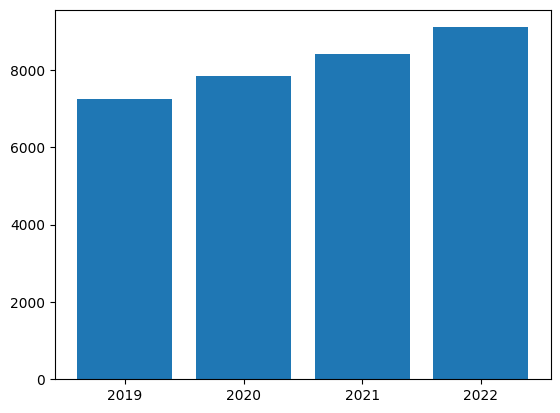

In [36]:
# дефолтная столбчатая диаграмма
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['2019', 7238, 7239],
             ['2020', 7497, 7840],
             ['2021', 8997, 8410],
             ['2022', 9472, 9107]]
df_columns = ['Год', 'Торговые площади Магнит, тыс. кв.м.',
              'Торговые площади X5Group, тыс. кв.м.']
df = pd.DataFrame(df_values, columns=df_columns)

plt.bar(df['Год'], df['Торговые площади X5Group, тыс. кв.м.'])

plt.show()

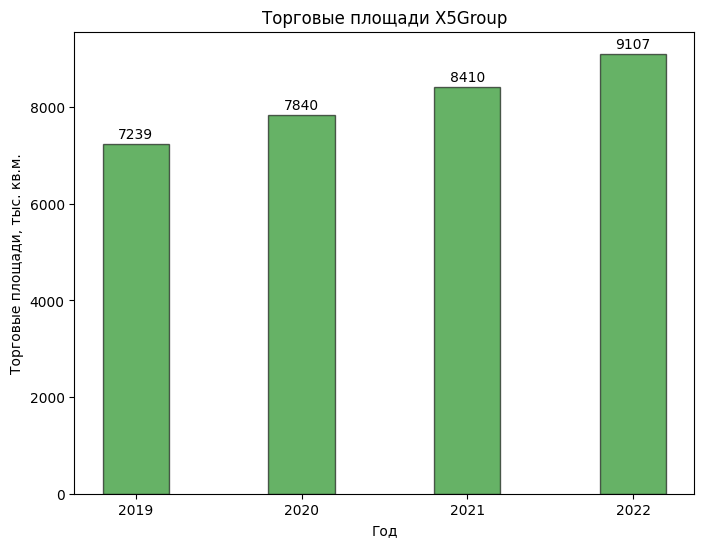

In [60]:
# кастомизированная столбчатая диаграмма
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['2019', 7238, 7239],
             ['2020', 7497, 7840],
             ['2021', 8997, 8410],
             ['2022', 9472, 9107]]
df_columns = ['Год', 'Торговые площади Магнит, тыс. кв.м.',
              'Торговые площади X5Group, тыс. кв.м.']

df = pd.DataFrame(df_values, columns=df_columns)

fig = plt.figure(figsize=(8, 6))
ax = plt.bar(df['Год'], df['Торговые площади X5Group, тыс. кв.м.'], 
        width=0.4, color='green', alpha=0.6, edgecolor='black')

# для подписи столбцов обязательно нужно, чтобы они были сохранены в отдельную переменную (здесь ax)
plt.bar_label(ax, padding=2)
plt.title('Торговые площади X5Group')
plt.xlabel('Год')
plt.ylabel('Торговые площади, тыс. кв.м.')

plt.show()

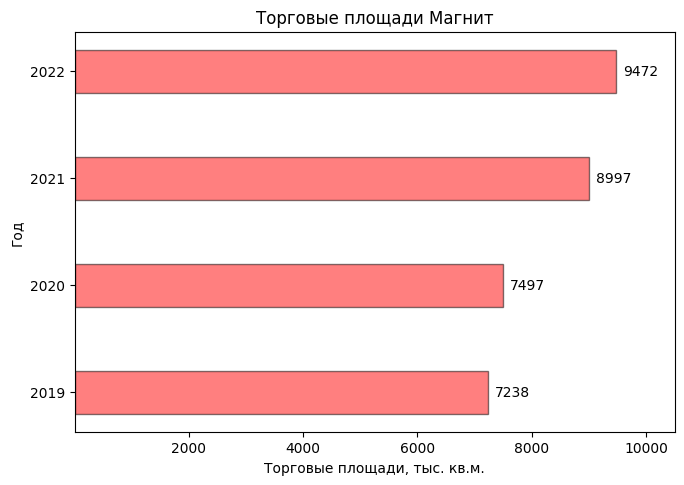

In [80]:
# кастомизированная столбчатая диаграмма с горизонтальным расположением столбцов
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['2019', 7238, 7239],
             ['2020', 7497, 7840],
             ['2021', 8997, 8410],
             ['2022', 9472, 9107]]
df_columns = ['Год', 'Торговые площади Магнит, тыс. кв.м.',
              'Торговые площади X5Group, тыс. кв.м.']

df = pd.DataFrame(df_values, columns=df_columns)

# отдельный холст и координатная плоскость созданы для принудительного задания размерности оси x, чтобы подписи не вылезали за край
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])

ax1 = ax.barh(df['Год'], df['Торговые площади Магнит, тыс. кв.м.'], 
        height=0.4, color='red', alpha=0.5, edgecolor='black')

# для подписи столбцов обязательно нужно, чтобы они были сохранены в отдельную переменную (здесь ax)
plt.bar_label(ax1, padding=5)
ax.set_xlim(0, 10500)
ax.set_xticks([2000, 4000, 6000, 8000, 10000])
plt.title('Торговые площади Магнит')
plt.xlabel('Торговые площади, тыс. кв.м.')
plt.ylabel('Год')

plt.show()

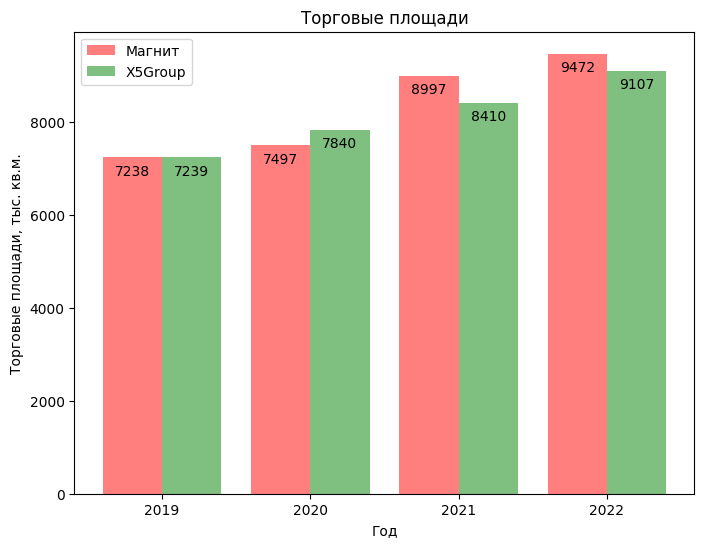

In [90]:
# пример построения графика со столбцами для двух переменных
import matplotlib.pyplot as plt
import pandas as pd

df_values = [['2019', 7238, 7239],
             ['2020', 7497, 7840],
             ['2021', 8997, 8410],
             ['2022', 9472, 9107]]
df_columns = ['Год', 'Торговые площади Магнит, тыс. кв.м.',
              'Торговые площади X5Group, тыс. кв.м.']

df = pd.DataFrame(df_values, columns=df_columns)

fig = plt.figure(figsize=(8, 6))

w = 0.2
x = df.index.values

ax1 = plt.bar(x-w, df['Торговые площади Магнит, тыс. кв.м.'],
        width=w*2, color='red', alpha=0.5)

ax2 = plt.bar(x+w, df['Торговые площади X5Group, тыс. кв.м.'], 
        width=w*2, color='green', alpha=0.5)

plt.xticks(ticks=x, labels=df['Год'])

plt.bar_label(ax1, padding=(-15))
plt.bar_label(ax2, padding=(-15))
plt.legend(['Магнит', 'X5Group'])
plt.title('Торговые площади')
plt.xlabel('Год')
plt.ylabel('Торговые площади, тыс. кв.м.')

plt.show()

<Axes: title={'center': 'Торговые площади'}, xlabel='Год', ylabel='Торговые площади, тыс. кв.м.'>

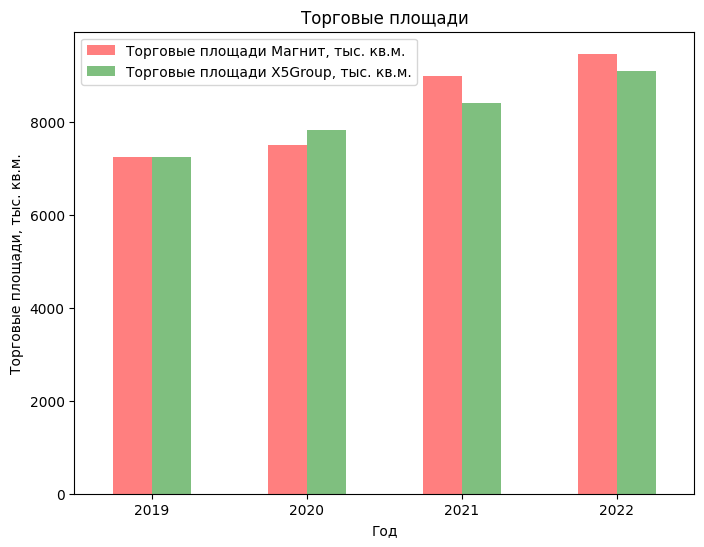

In [93]:
# пример построения аналогичного графика при помощи pd.plot()
import pandas as pd

df_values = [['2019', 7238, 7239],
             ['2020', 7497, 7840],
             ['2021', 8997, 8410],
             ['2022', 9472, 9107]]
df_columns = ['Год', 'Торговые площади Магнит, тыс. кв.м.',
              'Торговые площади X5Group, тыс. кв.м.']

df = pd.DataFrame(df_values, columns=df_columns)

df.plot(kind='bar', x='Год', xlabel='Год', ylabel='Торговые площади, тыс. кв.м.',
        figsize=(8, 6), color=['red', 'green'], alpha=0.5, rot=0,
        title='Торговые площади')